In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_main = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data.csv')
df_by_artist = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/rawdata/data_by_artist.csv', index_col = 0)

In [3]:
df_main

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [4]:
df_top10 = df_main[(df_main['artists'] == "['The Beatles']") | 
                   (df_main['artists'] == "['Drake']") |
                   (df_main['artists'] == "['Frank Sinatra']") |
                   (df_main['artists'] == "['The Rolling Stones']") |
                   (df_main['artists'] == "['Eminem']") |
                   (df_main['artists'] == "['Bob Dylan']") |
                   (df_main['artists'] == "['Elvis Presley']") | 
                   (df_main['artists'] == "['Johnny Cash']") | 
                   (df_main['artists'] == "['The Beach Boys']") | 
                   (df_main['artists'] == "['Led Zeppelin']")]

In [5]:
df_top10

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1755,0.1210,['Johnny Cash'],0.617,155835,0.587,0,5gGq4KxuYuivZWQpUi0HXT,0.001560,10,0.209,-13.291,0,Doin' My Time (2017 Remaster),14,1957-10-11,0.0315,105.613,0.7350,1957
1774,0.5680,['Johnny Cash'],0.729,100168,0.546,0,7ijlcVmEf35Hj6fQoO6HXz,0.000000,1,0.143,-13.060,0,If the Good Lord's Willing (2017 Remaster),14,1957-10-11,0.0538,106.291,0.8840,1957
1823,0.6690,['Johnny Cash'],0.696,151835,0.392,0,6hSqf21fRIwIiH5oaQ6yJD,0.000380,10,0.113,-12.971,1,"Folsom Prison Blues (Alternate Version, Take 2...",14,1957-10-11,0.0306,111.367,0.8390,1957
1833,0.5430,['Johnny Cash'],0.820,158169,0.365,0,0SoX8PxWYqL4zpuzuai35A,0.000102,10,0.102,-14.536,0,"I Walk the Line (Alternate Version, Take 1) (2...",13,1957-10-11,0.0442,102.355,0.7790,1957
1852,0.6420,['Johnny Cash'],0.777,182237,0.545,0,4wx7PQXybVqn1bD60WE7Sx,0.000257,5,0.118,-13.168,1,"Cry! Cry! Cry! (Alternate Version, Extended Ta...",13,1957-10-11,0.0909,104.567,0.8570,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169350,0.8550,['Frank Sinatra'],0.589,201200,0.369,0,0shGCs5AkhwJIgUb0SSz2B,0.000000,5,0.352,-8.678,0,The Way You Look Tonight,58,2015-04-21,0.0321,132.954,0.5290,2015
169451,0.3370,['Drake'],0.429,297373,0.430,1,03L2AoiRbWhvt7BDMx1jUB,0.000012,2,0.138,-11.373,1,U With Me?,60,2016-05-06,0.1650,174.984,0.1250,2016
169531,0.0681,['Drake'],0.736,218674,0.491,1,05KOgYg8PGeJyyWBPi5ja8,0.000000,10,0.571,-6.892,0,Free Smoke,64,2017-03-18,0.4390,141.979,0.2030,2017
169716,0.7790,['Drake'],0.421,281519,0.539,1,4Wjhj0WjkyECccfHVIgaTq,0.000000,11,0.111,-5.456,0,Trust Issues,68,2019-08-02,0.2740,89.177,0.5230,2019


In [6]:
df2 = df_top10.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'artists']]
df2.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,artists
1755,0.121,0.617,0.587,0.001560,10,0.209,-13.291,0.0315,105.613,0.735,['Johnny Cash']
1774,0.568,0.729,0.546,0.000000,1,0.143,-13.060,0.0538,106.291,0.884,['Johnny Cash']
1823,0.669,0.696,0.392,0.000380,10,0.113,-12.971,0.0306,111.367,0.839,['Johnny Cash']
1833,0.543,0.820,0.365,0.000102,10,0.102,-14.536,0.0442,102.355,0.779,['Johnny Cash']
1852,0.642,0.777,0.545,0.000257,5,0.118,-13.168,0.0909,104.567,0.857,['Johnny Cash']


In [7]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
x = df2.loc[:, features].values

In [8]:
y = df2.loc[:,['artists']].values

In [9]:
x = StandardScaler().fit_transform(x)

In [10]:
pd.DataFrame(data = x, columns = features).head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,-1.179927,0.637985,0.323273,-0.337008,1.357876,-0.149300,-0.651098,-0.432376,-0.427944,0.638591
1,0.225668,1.328233,0.156988,-0.344930,-1.194730,-0.447154,-0.592691,-0.206242,-0.405589,1.216350
2,0.543263,1.124857,-0.467597,-0.343001,1.357876,-0.582542,-0.570188,-0.441503,-0.238216,1.041859
3,0.147055,1.889060,-0.577102,-0.344412,1.357876,-0.632185,-0.965886,-0.303591,-0.535371,0.809204
4,0.458362,1.624054,0.152932,-0.343625,-0.060238,-0.559978,-0.619998,0.169973,-0.462435,1.111656


In [11]:
pca = PCA(n_components = 2)

In [12]:
principalComponents = pca.fit_transform(x)

In [13]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [14]:
df2['artists'] = df2['artists'].apply(lambda x: x[1:-1].split(', '))
df2 = df2.explode('artists')
df2['artists'] = df2['artists'].apply(lambda x: x.strip("'"))
df2[['artists']]
df2.reset_index(drop = True)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,artists
0,0.1210,0.617,0.587,0.001560,10,0.209,-13.291,0.0315,105.613,0.7350,Johnny Cash
1,0.5680,0.729,0.546,0.000000,1,0.143,-13.060,0.0538,106.291,0.8840,Johnny Cash
2,0.6690,0.696,0.392,0.000380,10,0.113,-12.971,0.0306,111.367,0.8390,Johnny Cash
3,0.5430,0.820,0.365,0.000102,10,0.102,-14.536,0.0442,102.355,0.7790,Johnny Cash
4,0.6420,0.777,0.545,0.000257,5,0.118,-13.168,0.0909,104.567,0.8570,Johnny Cash
...,...,...,...,...,...,...,...,...,...,...,...
4176,0.8550,0.589,0.369,0.000000,5,0.352,-8.678,0.0321,132.954,0.5290,Frank Sinatra
4177,0.3370,0.429,0.430,0.000012,2,0.138,-11.373,0.1650,174.984,0.1250,Drake
4178,0.0681,0.736,0.491,0.000000,10,0.571,-6.892,0.4390,141.979,0.2030,Drake
4179,0.7790,0.421,0.539,0.000000,11,0.111,-5.456,0.2740,89.177,0.5230,Drake


In [15]:
df_artists = df2[['artists']]
df_artists.reset_index(drop = True)
df_artists.head(20)
# df_artists.to_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/top20_artists_PCA.csv')

,artists
1755,Johnny Cash
1774,Johnny Cash
1823,Johnny Cash
1833,Johnny Cash
1852,Johnny Cash
1861,Frank Sinatra
1886,Frank Sinatra
1887,Johnny Cash
1899,Johnny Cash
1900,Frank Sinatra


In [16]:
principalDf
principalDf
# principalDf.to_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/principalDf_top20_artists.csv')

,principal component 1,principal component 2
0,-0.633489,-0.738238
1,-0.364470,-1.699302
2,0.179777,-1.797595
3,0.174344,-2.177498
4,-0.353294,-1.915990
...,...,...
4176,0.391756,-0.252435
4177,0.509284,1.263162
4178,-1.646254,1.496474
4179,-0.192594,-0.115336


In [19]:
finalDf = pd.read_csv('/Users/zoebjamal/Desktop/DataRes/team_pink/data/cleandata/PCA_top10_proper.csv', index_col = 0)
finalDf

,principal component 1,principal component 2,artists
0,-0.633489,-0.738238,Johnny Cash
1,-0.364470,-1.699302,Johnny Cash
2,0.179777,-1.797595,Johnny Cash
3,0.174344,-2.177498,Johnny Cash
4,-0.353294,-1.915990,Johnny Cash
...,...,...,...
4176,0.391756,-0.252435,Frank Sinatra
4177,0.509284,1.263162,Drake
4178,-1.646254,1.496474,Drake
4179,-0.192594,-0.115336,Drake


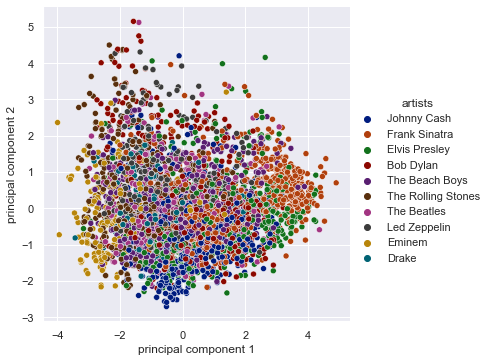

In [27]:
sns.set_theme(style = "darkgrid")
sns.set_context("notebook")
ax = sns.relplot(x = 'principal component 1', y = 'principal component 2', hue = 'artists', palette = "dark", data = finalDf)